# Data Exploration

## Null Values

After loading the dataset in out ipython interpreter as numpy array, we have to check to see if there are any missing values in the dataset. If there are, we have to deal with the missing values first. 


In [2]:
import numpy as np
import csv
f = open('creditcard.csv')

# read the header line
header = f.readline() 

# read rest of the data
data = list(csv.reader(f, delimiter=",",))

#seperate features and the class column. Convert features into float and class to int
np_data = np.asarray(data).astype(float)
print (np.isnan(np_data).any())


False


This shows that there are no null or empty values in the datafile. Therefore we can proceed without worrying about empty values.

## Number of Instances in Each Class
Intuatively there should be a lot more normal transections than fraudulent transactions. To see how unbalanced the dataset is, we count the number of instances with normal transection and the number of instances with fraudulent transaction. 

Fraudalent transactions : 492
Non fraudulent transactions : 284315


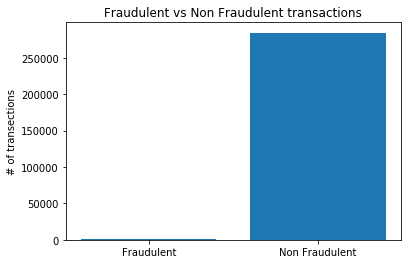

In [23]:
#import matplotlib for graph
import matplotlib.pyplot as plt

#seperate feature columns and target column
X = np_data[:,:-1]
y = np.ravel(np_data[:,-1:]).astype(int)

#count the number of fraudulent and non fraudulent transections
fraud = np.count_nonzero(y)
non_fraud = len(y)-fraud

#print result and show in a bar chart
print("Fraudalent transactions : " + str(fraud) + "\nNon fraudulent transactions : "+str(non_fraud))
plt.bar(['Fraudulent','Non Fraudulent'],[fraud,non_fraud])
plt.ylabel("# of transections")
plt.title("Fraudulent vs Non Fraudulent transactions")
plt.show()

The result shows that there are a lot more Normal transection compared to fraudulant transection. This imbalance can complicate our prediction model and result.

## Mean and Spread
Next we check the mean and the standard deviation of the features.

In [36]:
np.mean(X,axis=0)


array([ 3.91864870e-15,  5.68268579e-16, -8.76173610e-15,  2.81111774e-15,
       -1.55210305e-15,  2.04012968e-15, -1.69895265e-15, -1.95815061e-16,
       -3.14764036e-15,  1.77292451e-15,  9.28952385e-16, -1.80326603e-15,
        1.67488824e-15,  1.47562122e-15,  3.50109813e-15,  1.39243845e-15,
       -7.46653801e-16,  4.25873794e-16,  9.02016885e-16,  5.12684532e-16,
        1.47198194e-16,  8.04210901e-16,  5.28245009e-16,  4.45826738e-15,
        1.42689564e-15,  1.70163965e-15, -3.67160561e-16, -1.21815215e-16,
        8.83496193e+01])

In [37]:
np.std(X,axis=0)

array([  1.95869237,   1.65130568,   1.51625234,   1.41586609,
         1.38024431,   1.33226875,   1.23709143,   1.19435081,
         1.09863016,   1.08884785,   1.02071124,   0.99919964,
         0.99527248,   0.95859393,   0.9153144 ,   0.87625135,
         0.84933557,   0.83817474,   0.81403907,   0.77092367,
         0.73452272,   0.72570029,   0.6244592 ,   0.605646  ,
         0.52127716,   0.48222617,   0.40363179,   0.33008268,
       250.11967014])

We notice that the mean and std of the amount column is very different from the other features. For some classifiers, we will need to normalize the dataset.

## The Time Column
It is possible that the fraudulent transections are more frequent at certain parts of the day or certain days of the week. To see if fraudulent transections and time are related, we draw the following two graphs. The first one shows fradulent transetions over time and the second one shows normal transections over time.


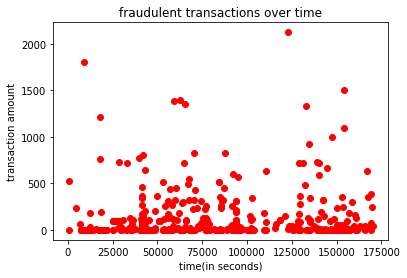

In [13]:
frauds = np_data[np.nonzero(np_data[:,-1:])[0]]
normal = np_data[np.nonzero(1-np_data[:,-1:])[0]]
fraud_x = frauds[:,0]
fraud_y = frauds[:,-2]
normal_x = normal[:,0]
normal_y = normal[:,-2]
plt.scatter(fraud_x,fraud_y,c='r')
plt.xlabel("time(in seconds)")
plt.ylabel("transaction amount")
plt.title("fraudulent transactions over time")
plt.show()

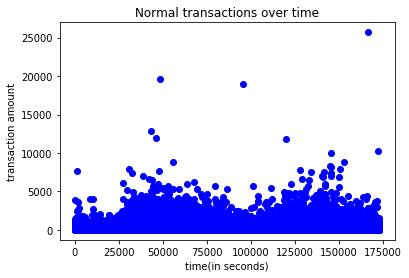

In [14]:
plt.scatter(normal_x,normal_y,c='b')
plt.xlabel("time(in seconds)")
plt.ylabel("transaction amount")
plt.title("Normal transactions over time")
plt.show()

From the two graphs we can see that, although Normal transections show certain "peak hours", both transations are almost evenly dirstributed over time. As such we discard the time column from our feature list in the preprocessing step. We note that the dataset covers a little over 2 days. If the dataset covered a longer period of time, a time series analysis of the dataset (such as LSTM) could have been useful.

## Baseline Prediction
Since there are more normal transactions than fradulant transactions, we formulate a baseline predictor or a "stupid predictor" which predicts every transection as normal transection. The accuracy of this baseline predictor can then be compared with our classification models for evaluation purpose.  
The accuracy of the baseline predictor is :


In [15]:
frud = np.count_nonzero(y)
score = ((len(y)-frud)/len(y))
print("Baseline prediction accuracy : " + str(score))

Baseline prediction accuracy : 0.9982725143693799


Therefore the baseline predictor is 99.82% accurate.  


#  Preprocessing
Based on the analysis in the last section, we remove the time column from the feature list and normalize the feature matrix.

In [3]:
from sklearn import preprocessing
#remove time column from feature matrix
X = np_data[:,1:-1]

y = np.ravel(np_data[:,-1:]).astype(int)

#scale the featrue matrix to have unit variance.
X = preprocessing.scale(X)

#  Classification Models
##  Logistic regression
Logistic regression is a log-linear classifier that uses stocastic gradient descent to minimize L2-log loss function. Because it is so simple and fast, we will try logistic regression first. We will use 5-fold cross validation to evaluate our model. We calculate the accuracy as well as the precision, recall and f1 score of the model. 

In [17]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
#ignore FutureWarnings
import warnings
from sklearn import exceptions
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=exceptions.UndefinedMetricWarning)

#create logistic regression classifier
clf = linear_model.SGDClassifier(loss='log')

#dictionary for scoring matrices
scoring = {'acc': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1':'f1'}

#do 5 fold evaluation
scores = cross_validate(clf, X, y,scoring=scoring, cv=5)

#print mean scores
print ("Mean accuracy : " + str(np.mean(scores['test_acc'])))

#Future implementation: We should really consider F1 instead of mean accuracy as the true performance measure of the model

print ("Precision : " + str(np.mean(scores['test_precision'])))
print ("Recall : " + str(np.mean(scores['test_recall'])))
print ("F1 : " + str(np.mean(scores['test_f1'])))

Mean accuracy : 0.9976475363876751
Precision : 0.0011111111111111111
Recall : 0.00202020202020202
F1 : 0.0014336917562724016


Therefore logistic regression gives nus 99.90% accuracy.  
**N.B Due to the imbalance in the data, we should really use preision,recall, and, f1 score as the true measure of the performance of a model, however due to lack of time I couldn't finish implementing this for the rest of the models and decided to simply use accuracy for this report**

## Logistic Regression with Undersampling
Since the classes are imbalanced (i.e there are too many normal transactions compared to fraudulant transactions), this can skew the learning algorithm. One possibl way to fix it is to do undersampling. In the folliwng code, we undersample the normal transection class and only take 40000 instances from that class for training. This 40000 number has been choosen empirically by some trial and error.

In [9]:
from sklearn.model_selection import KFold

#K-fold splitting
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X)
accuracy_score =[] 

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    #seperate fraudulent and normal transections 
    fraud_idx = np.nonzero(y_train)[0]
    normal_idx = np.nonzero(1-y_train)[0]

    fraud_X = X_train[fraud_idx]
    fraud_y = y_train[fraud_idx]
    normal_X = X_train[normal_idx]
    normal_y = y_train[normal_idx]
    
    #take only 40000 random rows from the normal transection class
    rand_choice = np.random.randint(normal_X.shape[0], size=50000)
    normal_X = normal_X[rand_choice,:]
    normal_y = normal_y[rand_choice]
    
    #keep all fraudulant transections
    X_train = np.vstack((normal_X,fraud_X))
    y_train = np.hstack((normal_y,fraud_y))
    
    #build model
    clf = linear_model.SGDClassifier(loss='log')

    #train model
    clf.fit(X_train,y_train)
    
    #predict
    accuracy_score.append(clf.score(X_test,y_test))
    
print("Mean accuracy : " + str(np.mean(accuracy_score)))

Mean accuracy : 0.999248613320227


The Logistic regression with undersampling gives us slightly better accuracy at 99.92%.

## Support Vector Machine
Support vecto machine is another classifier that is very effective in datasets with high dimensions. Here we will use a support vector machine with non linear kernel. We will again do a 5 fold cross validation to evaluate our model. The parameter C is chosen empirically after trying with some different values.

In [ ]:
from sklearn import svm

#create a svm classifier with rbf kernel
clf = svm.SVC(kernel='rbf', C=1)

#do 5 fold evaluation
scores = cross_validate(clf, X, y,scoring = scoring, cv=5)

#print mean scores
print ("Mean accuracy : " + str(np.mean(scores['test_acc'])))
#print ("Precision : " + str(np.mean(scores['test_precision'])))
#print ("Recall : " + str(np.mean(scores['test_recall'])))
#print ("F1 : " + str(np.mean(scores['test_f1'])))

Mean accuracy =~ .9980  
Therefore SVM performed worse than logistic regression with 99.80% accuracy.

## Deep Neural Net
Finally we try a deep neural net with three layers that is capable of forming much complex decision boundaries. We will use the Tensorflow library to perform DNN classification. The network size and number of steps are chosen empirically after doing some manual testing.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
# Specify that all features have real-value data
feature_columns = [tf.feature_column.numeric_column("x", shape=[29])]

# Build 3 layer DNN with 20,50,20 units respectively.
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                        hidden_units=[20, 50, 20],
                                        n_classes=2,
                                        )


# Find the indices for 5-fold cross validation
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X)

accuracy_score =[] 

#perform 5 fold cross validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #specify the training set
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": X_train},
        y=y_train,
        num_epochs=None,
        shuffle=True)
    
    #train the DNN with 2000 steps
    classifier.train(input_fn=train_input_fn, steps=2000)

    #specify the test set
    test_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": X_test},
        y=y_test,
        num_epochs=1,
        shuffle=False)

    # Evaluate accuracy.
    accuracy_score.append(classifier.evaluate(input_fn=test_input_fn)["accuracy"])

print("\nTest Accuracy: {0:f}\n".format(np.mean(accuracy_score)))


Test Accuracy: 0.999428

With 99.94% accuracy DNN classifier gives us the best accuracy so far.

# Results

|               | Baseline | Logistic Regression |Logistic Regression (with undersampling) | SVM (rbf kernel) | DNN Classifier |
| ------------- |:--------:|:-------------------:|:--------------------------------------:|:---------------:|--------------:|
| Accuracy      | 99.82    |    99.90            |  99.92             |   99.80         | 99.94           |



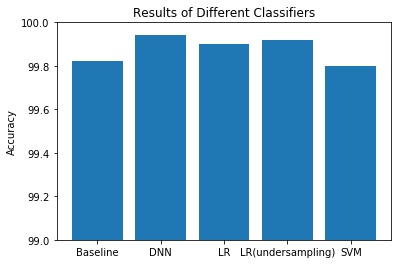

In [25]:
#draw result graph
plt.bar(['Baseline','LR','LR(undersampling)','SVM','DNN'],[99.82,99.90,99.92,99.80,99.94])
plt.ylabel("Accuracy")
plt.ylim(99,100)
plt.title("Results of Different Classifiers")
plt.show()

From the table and the graph above we can see that the DNN classifier performs the best, followed closely by Logistic regression with undersampling.